In [2]:
#Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing
#details of customers to predict customer response for special offer.
#Create confusion matrix based on above data and find
#a) Accuracy
#b) Precision
#c) Recall
#d) F-1 score

In [18]:
#Import necessory library
import pandas as pd
import seaborn as sn

In [19]:
#import dataset
data=pd.read_csv("Mall_Customers.csv")

In [20]:
#describe dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
#Display some rows of dataset
data.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [23]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [24]:
#Preprocess
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
# Create 'Response' column (1 if Spending Score > 50, else 0)
data['Response'] = data['Spending Score (1-100)'].apply(lambda x: 1 if x > 50 else 0)

In [54]:
# Drop 'CustomerID' as it's not useful for prediction
data.drop(columns=['CustomerID'], inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

In [31]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Response
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0


In [27]:
data['Response'] = data['Spending Score (1-100)'].apply(lambda x: 1 if x > 50 else 0)

In [32]:
#Define  features (X) and target (Y)
X = data.drop(columns=['Response'])  
y = data['Response']

In [34]:
from sklearn.model_selection import train_test_split


In [35]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Standardize the features to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
# Predict on test data
y_pred = model.predict(X_test)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

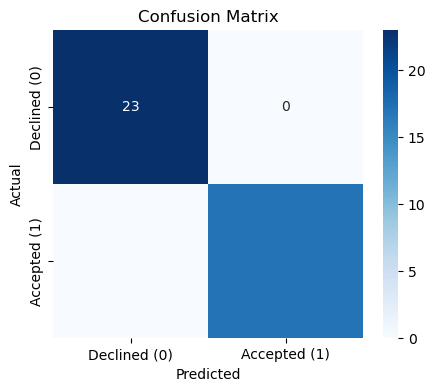

In [48]:

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Declined (0)", "Accepted (1)"], yticklabels=["Declined (0)", "Accepted (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [50]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f" Precision: {precision:.2f}")
print(f" Recall: {recall:.2f}")
print(f" F1-Score: {f1:.2f}")

Accuracy: 1.00
 Precision: 1.00
 Recall: 1.00
 F1-Score: 1.00
